In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler 



from 

In [99]:


#data set
dataset = pd.read_csv('D:\Documentos\MISCURSOS\Proyectos Git Hub\MACHINE-LEARNIG\supervised_Learning\classification\svm\dataset\DataSet_Iris_2_Clases.csv - Hoja 1.csv')

#dataset dataframe
x = dataset.drop('variety',axis=1)
y = dataset['variety']


# dataframe to np.array
xx = np.array(x)
yy = np.array(y)

#normalization data with StandardScaler
normalizar = StandardScaler()
normalizar.fit(xx)
xx_normalization = normalizar.transform(xx)


#split dataset
x_train, x_test, y_train, y_test = train_test_split(xx_normalization , yy , test_size= 0.3 , shuffle= True , random_state= 42)



#create model SVM linear/rbf
model_svm = svm.SVC(kernel='linear' , C=100)  # C: Hiperparametro de ajuste


#trianing model 
model_svm.fit(x_train,y_train)


#METRICS


#matric train
accuracy__train = accuracy_score(y_train, model_svm.predict(x_train))
matrix_comfusion_train = confusion_matrix(y_train, model_svm.predict(x_train))
report_model = classification_report(y_train, model_svm.predict(x_train))

print(f'El accuracy train es :{accuracy__train}')
print(f'matrix confusion train:\n{matrix_comfusion_train}\n')
print(f'report model train :\n {report_model}\n')



#metrics testing 
accuracy_test= accuracy_score(y_test  , model_svm.predict(x_test))
matrix_confusion_test = confusion_matrix(y_test ,  model_svm.predict(x_test))
report_test = classification_report(y_test , model_svm.predict(x_test))



print(f'El accuracy test es :{accuracy_test}')
print(f'matrix confusion test:\n{matrix_confusion_test}\n')
print(f'report model test : \n{report_test}\n')
#model_svm.fit(xx[:,[2,3]],yy)



El accuracy train es :1.0
matrix confusion train:
[[37  0]
 [ 0 33]]

report model train :
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        33

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70


El accuracy test es :1.0
matrix confusion test:
[[13  0]
 [ 0 17]]

report model test : 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




### ***PLOTING SVM DOUNDARIES***


In [ ]:
import 

In [100]:
x_train

array([[-1.05093052e+00,  6.31902691e-01, -8.74308565e-01,
        -1.04211089e+00],
       [-1.36417359e+00,  2.12033793e-01, -1.01297765e+00,
        -1.04211089e+00],
       [ 8.28527933e-01,  6.31902691e-01,  1.13639313e+00,
         1.44757384e+00],
       [-4.24444366e-01,  6.31902691e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-7.37687441e-01, -1.67737625e+00,  3.04378636e-01,
         3.80566095e-01],
       [-1.11201292e-01,  1.68157493e+00, -8.04974023e-01,
        -6.86441647e-01],
       [ 2.02041783e-01, -2.07835104e-01,  1.13639313e+00,
         1.26973921e+00],
       [ 1.92487869e+00,  2.09934449e-03,  1.06705859e+00,
         1.09190459e+00],
       [-7.37687441e-01,  2.12033793e-01, -1.15164673e+00,
        -1.04211089e+00],
       [-1.11201292e-01,  1.68157493e+00, -1.08231219e+00,
        -6.86441647e-01],
       [-7.37687441e-01,  4.21968242e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-8.94308978e-01,  2.09934449e-03, -9.43643106e-01,
      

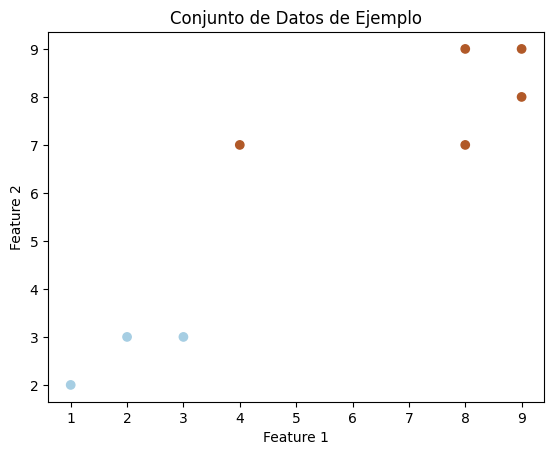

In [95]:
import matplotlib.pyplot as plt

# Datos de ejemplo
X = [[1, 2], [2, 3], [3, 3], [8, 9], [9, 8], [8, 7], [9, 9], [4, 7]]
y = [0, 0, 0, 1, 1, 1, 1, 1]

# Graficar los puntos
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, cmap=plt.cm.Paired, marker='o')

# Etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de Datos de Ejemplo')

# Mostrar el gráfico
plt.show()
 

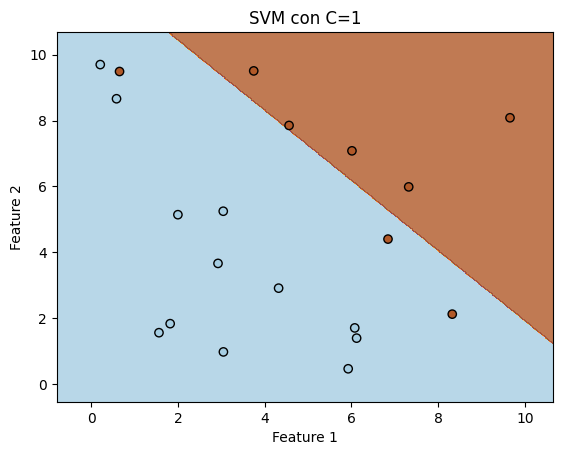

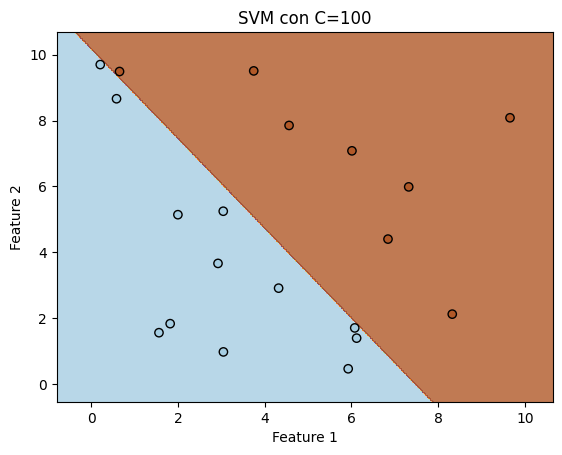

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Generar datos de ejemplo
np.random.seed(42)
X = np.random.rand(20, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

# Crear un modelo SVM con diferentes valores de C
model_C1 = SVC(kernel='linear', C=0.01)
model_C100 = SVC(kernel='linear', C=100)

# Ajustar los modelos al conjunto de datos
model_C1.fit(X, y)
model_C100.fit(X, y)

# Función para graficar los límites de decisión
def plot_decision_boundary(model, title):
    h = .02  # tamaño de paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar límites de decisión y márgenes
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Graficar límites de decisión para diferentes valores de C
plot_decision_boundary(model_C1, 'SVM con C=1')
plot_decision_boundary(model_C100, 'SVM con C=100')



## **EXAMEN 2** :DATA SET :Load datasets 

In [97]:
from sklearn.datasets import load_iris

dataset_iris = load_iris()
x = dataset_iris['data']
y = dataset_iris['target']

y =  (np.array(y)).reshape(-1,1)


data_new = np.concatenate((x, y), axis= 1)
data_new 

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 100.

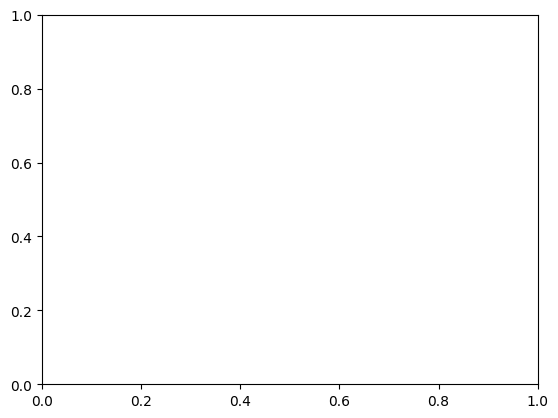

In [98]:
#graficamos los datos 
cmap = ListedColormap(['red','g','blue'])
plt.scatter(xx[:,2],xx[:,3],c=y,s = 40, cmap=cmap)


#create me
ax = plt.gca()  # con esto nos referimos a la grafica actual
xlim = ax.get_xlim()  #del ejex (minimo,maximo) que esta graficado
ylim = ax.get_ylim()   #del ejey (minimo,maximo) que esta graficado

x_x = np.linspace(xlim[0],xlim[1], 100) #array de 100 espacioados igualmente
y_y = np.linspace(ylim[0],ylim[1], 100) #arrya de 100 espaciados igualmente


X_X,Y_Y = np.meshgrid(x_x,y_y)            #creauna matrix cuadrada

xy = np.vstack([X_X.ravel(),Y_Y.ravel()]).T  #ravel convierte en unidemensional y luego apila y despues hace su transpuesta
Z = model_svm.decision_function(xy).reshape(X_X.shape) 

ax.contour(X_X, Y_Y, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])


#graficamos los vectores de soporte
z_predic = model_svm.predict(np.c_[X_X.ravel(), Y_Y.ravel()])
z_predic = z_predic.reshape(X_X.shape)


cmap = ListedColormap(['g','k'])

plt.pcolormesh(X_X,Y_Y,z_predic,cmap=cmap,alpha=0.1)


new_x = [[3,0.5]]
new_z = model_svm.predict(new_x)
if new_z[0]==0: color='k'
else: color='r'
plt.scatter(new_x[0][0],new_x[0][1] , marker = '+',color=color,s=300)
plt.grid()
plt.show()
print(xy)

print(np.shape(xy))

### PROBLEMA DE CLASES LINEALMENTE NO SEPARABLE

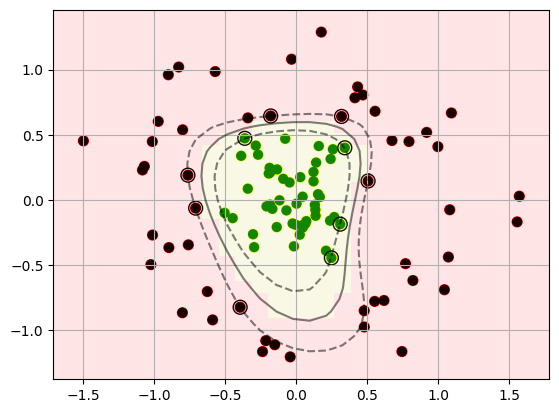

In [ ]:
# Veamos el uso de kernels para el problema de clases linealmente no separables
from sklearn.datasets import make_circles
import matplotlib
# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(100, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

clf = svm.SVC(kernel='rbf', C=100).fit(X, y)  

cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()




In [ ]:
import numpy as np 
import pandas as pd


data_world = pd.read_csv('D:/Documentos/MISCURSOS/Proyectos Git Hub/MACHINE-LEARNIG/supervised_Learning/regression/polynomicalRegression/WorldHappinessReport.csv')
data_world

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [ ]:
matrix_corr = data_world.corr(numeric_only=True)
matrix_corr

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

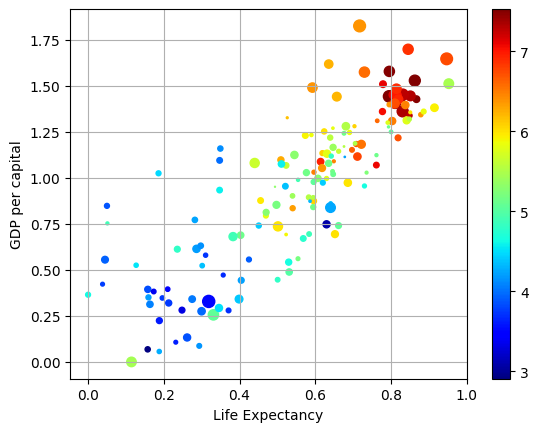

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_world['Health (Life Expectancy)'],data_world['Economy (GDP per Capita)'], s = data_world['Trust (Government Corruption)']*150 ,c = data_world['Happiness Score'] , cmap='jet')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per capital')
plt.colorbar()

plt.grid()

plt.bar


In [ ]:
data_world

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [ ]:
# vemos que la data en region tiene diferentes zonas, estos podemos podemos menejarlo mediante numeros 

from sklearn.preprocessing import OrdinalEncoder



ordinal_encoder = OrdinalEncoder()

data_world_region = data_world['Region']  #Seleccion de la variable categorica
print(data_world['Region'].value_counts())  # no da la cantidad de cada varible categorica
data_world_encoding = ordinal_encoder.fit_transform(np.array(data_world_region).reshape(-1,1)) #dataframe a np.array en una dimension y luego encoder


ordinal_encoder.categories_ # el atributo categorico

"""tenemos que tener en cuenta de una cosa:

        - los valores que estan cerca, decir que ono lejano a otro podria causar problemas.
        - muy malo- malo - bueno - muy bueno - exelente (en este caso no causaria tanto problema)
        """







Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


'tenemos que tener en cuenta de una cosa:\n\n        - los valores que estan cerca, decir que ono lejano a otro podria causar problemas.\n        - muy malo- malo - bueno - muy bueno - exelente (en este caso no causaria tanto problema)\n        '